# Model Task Types - Random Forest Regression

> Objectives:
>
> - Learn how to implement **Random Forest Regression** for predicting numerical targets.
> - Use the **Bike Sharing Dataset**, which contains data about bike rental demand based on environmental and seasonal features.
> - Build, train, and evaluate a Random Forest Regression model.
> - Analyze feature importance and evaluate model performance using metrics and visualization.

### Main Goal
The objective is to use a Random Forest Regression model to predict the number of bike rentals (the `cnt` column) based on these features. <br />
This is a regression problem, where the target variable `cnt` is a continuous numeric value representing the number of bikes rented.

### Imports

In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### Dataset: Bike Sharing Dataset

#### Source:
The data set is already in the `bike-sharing-dataset` folder. It was downloaded from the **UCI Machine Learning Repository**:  
[https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).
We will Use the `hour.csv` file for this exercise.

#### Features:
- **Seasonal Information**: Season, year, month, and day of the week.
- **Environmental Conditions**: Temperature, humidity, and wind speed.
- **Target**: The total number of bike rentals for a given hour (`count`).

### Step 1: Load the Dataset

In [54]:
file_path = "./bike-sharing-dataset/hour.csv"
df = pd.read_csv(file_path)

# Display sample data
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Step 2: Preprocess the Data

First, we drop irrelevant columns. `"dteday"` and `"instant"` aren’t useful for prediction, so they go. More importantly, we **must** drop `"casual"` and `"registered"` to prevent data leakage—since `"cnt"` (our target) is literally the sum of these two, keeping them would let the model cheat by learning a direct relationship. 

Next, we split our dataset: 
- `X` contains all features except the target (`"cnt"`). 
- `y` is just `"cnt"`, which we want to predict. 

In [55]:
# Drop irrelevant columns for this exercise -  "casual" and "registered" need to be dropped to not bias the
# since "cnt" (your target) is the sum of "casual" and "registered":
df = df.drop(["dteday", "instant", "casual", "registered"], axis=1)

# Split features and target
X = df.drop(["cnt"], axis=1) # All features except target
y = df["cnt"] # Target column

**Note:** Run this cell only once; otherwise, you'll encounter an error because the columns will have already been dropped from the dataset.

### Step 3: Split the Data

The dataset is split into training and testing sets, with 80% of the data used for training and 20% reserved for testing. Setting `random_state=42` ensures reproducibility of results.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### Step 4: Train the Model

A Random Forest Regressor is initialized with 100 trees (`n_estimators=100`) and a fixed `random_state=42` for consistency. The model is then trained using the training data.

In [57]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Step 5: Get the Predictions

In [58]:
y_pred = rf.predict(X_test)

### Step 6: Evaluate the Model  

In this step, we evaluate the model's performance using several metrics to understand its accuracy:

- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower values indicate better accuracy.
- **Mean Absolute Error (MAE)**: Represents the average absolute difference between actual and predicted values, giving a more interpretable error magnitude.
- **R-Squared (R²)**: Indicates how well the model explains variance in the target variable. A value closer to 1 means better performance.


In [59]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error: 1769.84
Mean Absolute Error: 24.90
R-Squared: 0.94


#### Model Evaluation Results

- **MSE**
  The MSE value of 1769.84 indicates that, on average, the model's predictions are off by a substantial amount when squared. This suggests there might be significant errors in certain predictions.

- **MAE**
  The MAE value of 24.90 suggests that, on average, the model's predictions are off by about 24.90 units from the true (actual) values. This provides a more interpretable measure of error compared to MSE, reflecting the magnitude of the errors in the same units as the target variable.

- **R²**
  An R² of 0.94 indicates that the model explains 94% of the variance in the target variable. This is a strong indicator that the model fits the data well, although there are still 6% of variations unexplained by the model.

### Step 7: Visualize Actual vs Predicted

In this step, we're visualizing how well the model’s predictions match the actual values. The plot shows two main components:

- **Blue Points**: Represent the actual values from `y_test`. These are the ground truth values you’re trying to predict.
- **Orange Points**: Represent the predicted values from the model (`y_pred`). These are the model's estimates for the actual values.

Additionally, a red dashed line represents the line of perfect predictions, where the actual and predicted values are identical. If the model were to predict perfectly, all the orange points would fall exactly on this line.

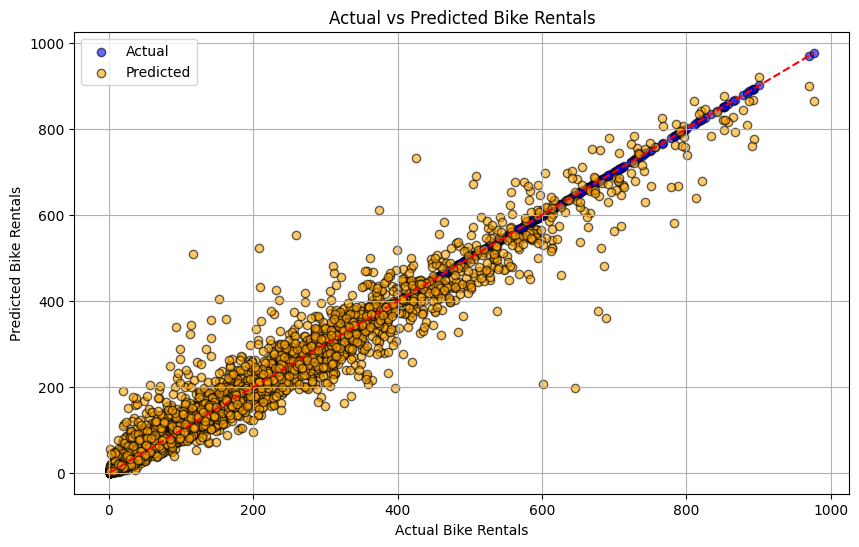

In [60]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Plotting the comparison
plt.figure(figsize=(10, 6))

plt.scatter(comparison_df["Actual"], comparison_df["Actual"],
            color='blue', label='Actual', alpha=0.6, edgecolors='k')
plt.scatter(comparison_df["Actual"], comparison_df["Predicted"],
            color='orange', label='Predicted', alpha=0.6, edgecolors='k')

# Plot a line for perfect predictions (y = x)
plt.plot([comparison_df["Actual"].min(), comparison_df["Actual"].max()],
         [comparison_df["Actual"].min(), comparison_df["Actual"].max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Bike Rentals")
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.legend()
plt.grid(True)
plt.show()

#### Insights from the Graph

- **How close the predictions are**: The closer the orange points are to the red dashed line, the better the model is performing.
- **Spread of the predictions**: If the orange points are scattered far from the red line, it indicates a higher prediction error.
- **Outliers**: Any significant deviations from the line (either high or low) might indicate outliers where the model failed to make accurate predictions.

### Step 8: Analyze Feature Importance

In this step, we evaluate which features (input variables) the trained model considers most important for making predictions. The `RandomForestRegressor` has a built-in mechanism to rank features based on their contribution to the model's predictions.

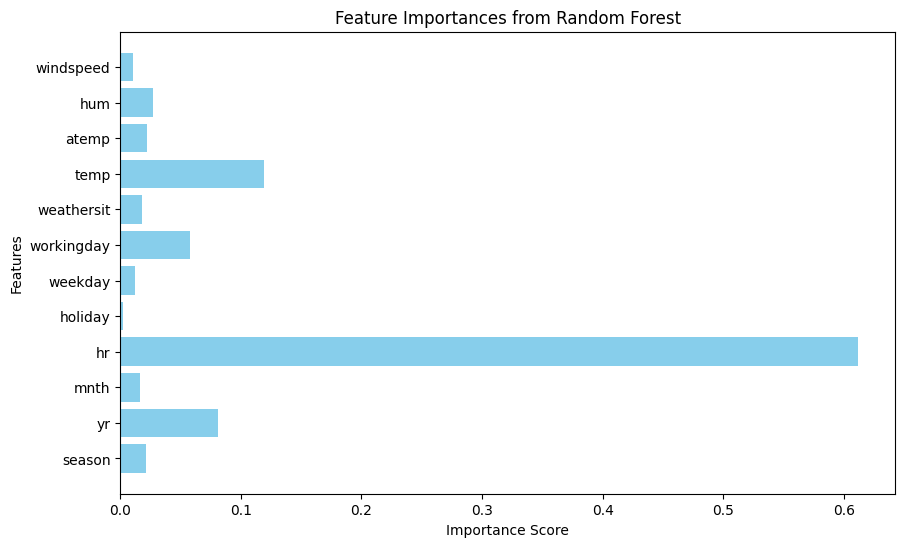

In [61]:
# Get the feature importances from the trained model
importances = rf.feature_importances_

# Ensure features match the trained dataset
features = X_train.columns  # Use the columns from X_train used during training

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()

From the graph, we observe that the **hour** (`hr`) feature stands out as the most important by far, with a much larger importance score compared to other features. This suggests that the model heavily relies on the hour of the day to predict bike rentals.